<a href="https://colab.research.google.com/github/tiagoalvescordeiro/global-solution-enchentes/blob/main/modelo_random_forest_enchentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import joblib

# Se for usar o Drive, descomente estas linhas:
# from google.colab import drive
# drive.mount('/content/drive')
# BASE_DRIVE = '/content/drive/MyDrive/seu_projeto'
# os.makedirs(BASE_DRIVE, exist_ok=True)


In [9]:
# --- Célula 2: Carregamento do CSV e inspeção de colunas ---

# (Não precisamos montar o Drive, pois 'dados_enchentes.csv' já está em /content/)
# from google.colab import drive
# drive.mount('/content/drive')

# Ajuste direto para a raiz do Colab:
csv_path = '/content/dados_enchentes.csv'

df = pd.read_csv(csv_path)
print("Colunas disponíveis no DataFrame:")
print(df.columns.tolist())


Colunas disponíveis no DataFrame:
['chuva_1h', 'chuva_6h', 'chuva_24h', 'nivel_rio', 'tendencia_rio', 'umidade', 'vento', 'risco_enchente']


In [10]:
# 1) Nome exato da coluna-alvo (copie da impressão acima, respeitando maiúsculas/minúsculas)
nome_exato_do_alvo = 'risco_enchente'

# 2) (Opcional) Remover espaços “invisíveis” do nome das colunas e padronizar para minúsculas
# df.columns = df.columns.str.strip().str.lower()
# nome_exato_do_alvo = nome_exato_do_alvo.lower()

# 3) Verifica se o alvo realmente existe
if nome_exato_do_alvo not in df.columns:
    raise KeyError(f"A coluna '{nome_exato_do_alvo}' não existe em df.columns: {df.columns.tolist()}")

# 4) Tratamento básico de nulos (apenas como exemplo; adapte conforme for preciso)
df = df.dropna()

# 5) Separa preditoras (X) e alvo (y)
X = df.drop(columns=[nome_exato_do_alvo])
y = df[nome_exato_do_alvo]

print(f"Shape de X: {X.shape} | Shape de y: {y.shape}")

# 6) One-hot encode para variáveis categóricas (se houver)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 7) Verifica distribuição das classes em y
print("\nDistribuição das classes (y):")
print(y.value_counts())


Shape de X: (300, 7) | Shape de y: (300,)

Distribuição das classes (y):
risco_enchente
0    287
1     13
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

# Faz o split estratificado, criando X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% para teste, 80% para treino
    random_state=42,
    stratify=y           # garante mesma proporção de classes em treino e teste
)

print(f"Tamanho treino: {X_train.shape}, Tamanho teste: {X_test.shape}")


Tamanho treino: (240, 7), Tamanho teste: (60, 7)


In [12]:
# 1) Cria o modelo e ajusta hiperparâmetros conforme desejar
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# 2) Treina o modelo
# Atenção: NÃO use espaço em “X_train” ou “y_train” (deve ser exato)
modelo.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

Matriz de Confusão:
 [[57  0]
 [ 3  0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       0.00      0.00      0.00         3

    accuracy                           0.95        60
   macro avg       0.47      0.50      0.49        60
weighted avg       0.90      0.95      0.93        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


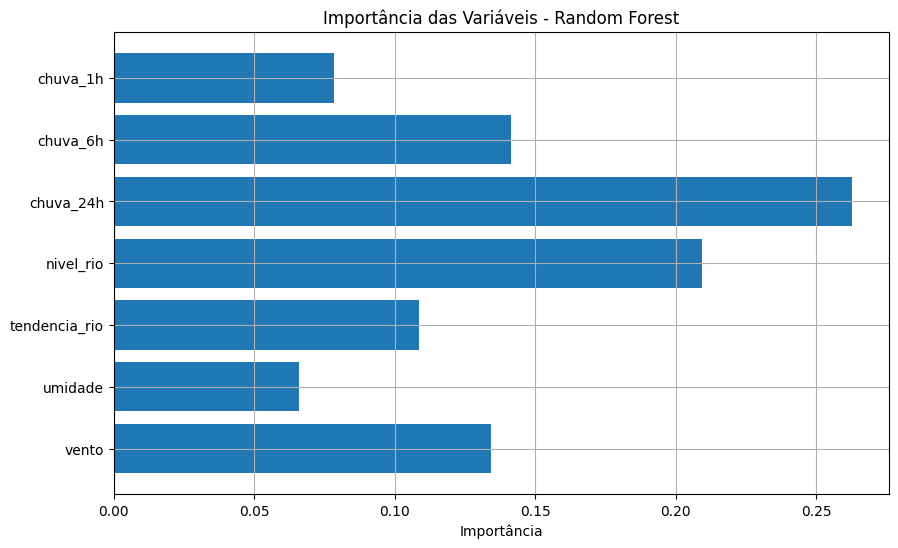

In [13]:
# 1) Faz predição sobre X_test
y_pred = modelo.predict(X_test)

# 2) Exibe métricas
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 3) Importância de variáveis
importancias = modelo.feature_importances_
nomes_variaveis = X.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_variaveis, importancias)
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [14]:
import os

# 1) Defina onde quer salvar. Se tiver montado o Drive, troque '/content/modelo' por algo como os.path.join(BASE_DRIVE, 'modelo')
output_dir = '/content/modelo'
os.makedirs(output_dir, exist_ok=True)

# 2) Grava o .pkl
output_path = os.path.join(output_dir, 'modelo_risco_enchente.pkl')
joblib.dump(modelo, output_path)
print(f"Modelo salvo em: {output_path}")

# 3) (Opcional) Lista o que está em /content/modelo para você conferir
print("\nConteúdo da pasta 'modelo':", os.listdir(output_dir))


Modelo salvo em: /content/modelo/modelo_risco_enchente.pkl

Conteúdo da pasta 'modelo': ['modelo_risco_enchente.pkl']
